In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Breast_Cancer_data.csv")

data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<AxesSubplot:>

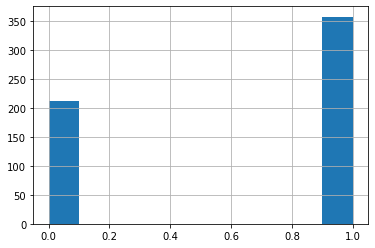

In [3]:
data["diagnosis"].hist()

<AxesSubplot:>

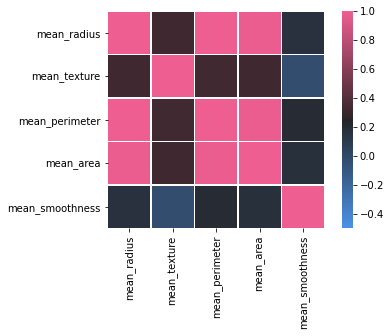

In [4]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [5]:
data=data[["mean_radius","mean_texture","mean_smoothness","diagnosis"]]

data.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


<AxesSubplot:xlabel='mean_smoothness', ylabel='Count'>

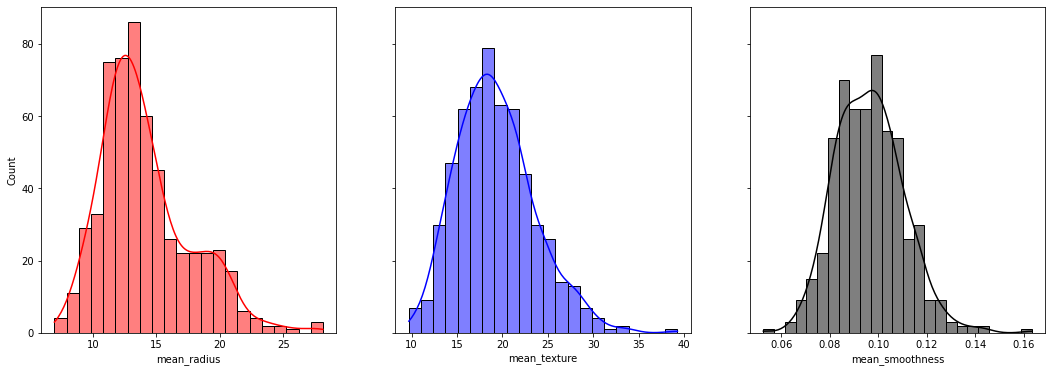

In [6]:
fig,axes=plt.subplots(1,3,figsize=(18,6),sharey=True)
sns.histplot(data,ax=axes[0],x="mean_radius",kde=True,color='r')
sns.histplot(data,ax=axes[1],x="mean_texture",kde=True,color='b')
sns.histplot(data,ax=axes[2],x="mean_smoothness",kde=True,color='k')

In [7]:
def calculate_prior(df,Y):
    classes=sorted(list(df[Y].unique()))
    prior=[]

    for i in classes:
        prior.append(len(df[df[Y]==i])/len(Y))
    return prior


In [8]:
def calculate_gaussian(df,feat_name,feat_val,Y,label):
    feat=list(df.columns)
    df=df[df[Y]==label]

    mean,std=df[feat_name].mean(),df[feat_name].std()

    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))

    return p_x_given_y




In [9]:
def naive_bayes(df,X,Y):
    features=list(df.columns)[:-1]

    prior=calculate_prior(df,Y)

    Y_pred=[]

    for x in X:
        labels=sorted(list(df[Y].unique()))
        
        likelihood=[1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j]*=calculate_gaussian(df,features[i],x[i],Y,labels[j])

        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j] 
        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)


In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))


[[36  4]
 [ 0 74]]
0.9736842105263158
